In [1]:
# Embedding
# 수많은 데이터, 벡터 형태로 표현할 수 있다. 텍스트 분류를 위해 사용하기 가장 기본에 해당하는 층
# 사전학습된 가중치를 불러와서 사용할 수 있습니다.

# 원리?
# 토큰 : 문법적으로 더 이상 나눌 수 없는 언어 요소
# 토큰화. 정의된 토큰에 고유 인덱스를 부여한 뒤 인코딩을 통해서 적절한 형태로 바꿔주는 전처리 작업 과정을 거친다.
# 원-핫 인코딩(One hot encoding). 이진 인코딩. 텍스트 데이터를 사용하는 경우 기본적으로 embedding층
# 워드 임베딩이라고 한다.



In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

texts = ['You are the Best',
        'You are the Nice']
# oov_token : 인자로 전달된 개체로 단어를 대체한다.
tokenizer = Tokenizer(num_words = 10, oov_token = '<OOV>') # num_words : 최대 단어 갯수, oov : out of vocablary : 들어온 인자가 없을 때 ovv로 대체
tokenizer.fit_on_texts(texts)

# 텍스트 데이터를 정수 인덱스 형태로 반환합니다.
# texts_to_sequences(text) : 토큰화를 통해 각 토큰에 부여된 인덱스를 활용해서 주어진 문장에 존재하는 단어를 인덱스로 반환한다.
sequences = tokenizer.texts_to_sequences(texts)

# 이진 형태로 인코딩합니다.
# sequences_to_materix : 이진 형태로 인코딩된 결과를 얻을 수 있다.
binary_results = tokenizer.sequences_to_matrix(sequences, mode = 'binary')

print(tokenizer.word_index)
print('-------------------')

print(f'sequences {sequences}\n')
print(f'binary_vector : \n {binary_results}\n')

# 원 핫 형태로 이코딩
# 원-핫 형태로 인코딩한 결과를 얻게된다.
# 벡터를 희소행렬이라고 한다.
# 희소행렬이란? : 존재하는 단어의 인덱스를 제외하고 전부 0으로 표현합니다.
# 희소행렬은 고차원에 해당하며, 단어의 유사성을 푠현할 수 있습니다.
# 학습에 부정적인 영향을 끼치는 행렬의 고차원은 불필요한 계산이 추가됩니다.
# 차원의 저주(Curse of dimensionality) : - 수학적 공간 차원(=변수 개수)이 늘어나면서, 문제 계산법이 지수적으로 커지는 상황
# - 차원이 높아질수록 데이터 사이의 거리가 멀어지고, 빈공간이 증가하는 공간의 성김 현상(Sparsity)을 보임
print(to_categorical(sequences))

# 밀집행렬 : embading층이 밀집행렬이다.
# 각 단어의 관계를 실수로 표현한다. 저차원에 해당합니다. 행렬이 속해있는 각 실수값은 0과 1로 직접 지정해주는 희소행렬과 다르게 데이터를 기반으로 조정합니다.
# 학습이 적절하게 진행되었다면 유사한 의미를 가지는 단어는 비슷한 공간이 표현된다.

test_text = ['You are the One'] # One이 없어서 인자값인 OOV인 1로 들어감 -> test sequences = [[2, 3, 4, 1]]에서 1
test_seq = tokenizer.texts_to_sequences(test_text)

print(f'test sequences : {test_seq}')

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
-------------------
sequences [[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vector : 
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]

[[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]
test sequences : [[2, 3, 4, 1]]


In [3]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)
print(x_train.shape, y_train.shape)

C:\Users\sbs\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,) (25000,)


C:\Users\sbs\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
# 전저리 과정이 수행된 첫번째 데이터, 레이블
print(x_train[0])
print('===========================================================================')
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [5]:
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key
    
for i in range(1, 4):
    print('{}번째로 가장 많이 쓰인 단어 : {}'.format(i, imdb_get_word_index[i]))

1번째로 가장 많이 쓰인 단어 : the
2번째로 가장 많이 쓰인 단어 : and
3번째로 가장 많이 쓰인 단어 : a


In [6]:
# 시퀀스 데이터의 길이가 전부 동일해야 됩니다.
# pad_sequences()라는 함수를 사용한다.
# 이 함수는 해당 데이터가 지정한 길이보다 짫은 경우 0을 넣고, 긴 경우 잘라내는 역할을 합니다.
from tensorflow.keras.preprocessing.sequence import pad_sequences


max_len = 500

print('before pad_sequences : ', len(x_train[0]))

pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = 'pre')
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = 'pre')

print('after pad_sequences : ', len(pad_x_train[0]))

print(pad_x_train)

print('before pad_sequences : ', len(x_train[0]))

pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = 'post')
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = 'post')

print('after pad_sequences : ', len(pad_x_train[0]))

print(pad_x_train)

before pad_sequences :  218
after pad_sequences :  500
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]
before pad_sequences :  218
after pad_sequences :  500
[[   1   14   22 ...    0    0    0]
 [   1  194 1153 ...    0    0    0]
 [   1   14   47 ...    0    0    0]
 ...
 [   1   11    6 ...    0    0    0]
 [   1 1446 7079 ...    0    0    0]
 [   1   17    6 ...    0    0    0]]


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

model = Sequential()
# 이 층은 모델의 제일 첫번째 층으로만 사용할 수 있다.
# Flatten층을 사용하기 위해서 input_length가 전달 된다.
model.add(Embedding(input_dim = num_words, output_dim = 32,
                   input_length = max_len)) # 순환연결층의 기초에서는 이 변수들만 들어감.
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(pad_x_train, y_train, batch_size = 32, epochs = 32, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/32
20000/20000 [==============================] - 4s 204us/sample - loss: 0.4801 - acc: 0.7557 - val_loss: 0.3133 - val_acc: 0.8740
Epoch 2/32
20000/20000 [==============================] - 4s 178us/sample - loss: 0.2142 - acc: 0.9206 - val_loss: 0.3055 - val_acc: 0.8758
Epoch 3/32
20000/20000 [==============================] - 4s 178us/sample - loss: 0.1141 - acc: 0.9668 - val_loss: 0.3045 - val_acc: 0.8818
Epoch 4/32
20000/20000 [==============================] - 3s 175us/sample - loss: 0.0554 - acc: 0.9900 - val_loss: 0.3405 - val_acc: 0.8754
Epoch 5/32
20000/20000 [==============================] - 4s 177us/sample - loss: 0.0264 - acc: 0.9971 - val_loss: 0.3601 - val_acc: 0.8758
Epoch 6/32
20000/20000 [==============================] - 4s 178us/sample - loss: 0.0131 - acc: 0.9992 - val_loss: 0.3919 - val_acc: 0.8732
Epoch 7/32
20000/20000 [==============================] - 4s 183us/sample - loss: 0.0074 - acc: 0.9998 - val_lo

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dic['acc']
val_acc = his_dic['val_acc']

ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax1.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()

In [ ]:
model.evaluate(pad_x_test, y_test)


In [ ]:
# RNN
# 단순한 데이터 표현을 학습해서 데이터 사전을 구축합니다.
# 유사한의미와 단어를 비슷한 공간에 매핑할 수 있지만 시퀀스 데이터의 중요한 특정한 순서의 맥락까지 생각해서 매핑하는 것은 아닙니다!
# 순환신경망 <-> 완전연결층, 컨볼루션 신경망
# 완전연결층, 컨볼루션 신경망 : 피드 포워드 네트워크(feed-forward network)
# 신경망이 가지는 모든 출력값이 마지막층인 출력층을 향합니다.

# 순환신경망은 각 층의 결과값이 출력층을 향하면서도 동시에 현재 층의 다음 계싼에 사용 노드가 출력값을 반환하는 동시에 이전 상태를 기억하는 메모리 역할을 수행
# RNN 셀, 은닉 상태

'''
# 의사 코드(간략하게 짜놓은 코드)
state_t = 0

# 각 시점에 해당하는 입력을 반복
for input_t in input_sequence:
    # 입력과 은닉상태를 활성화 함수에 통과시킵니다.
    output_t = activation_funt(input_t, state_t)
    # 출력값은 다음 시점을 위한 은닉상태가 됩니다.
    state_t = output_t
'''

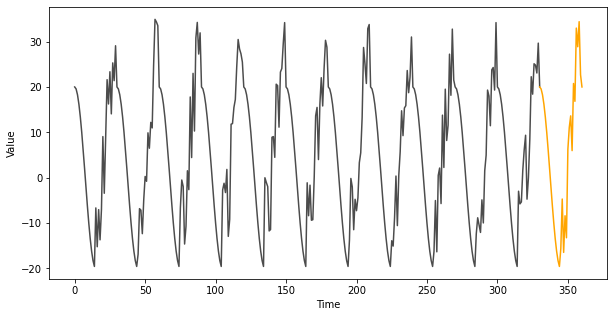

In [41]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)
time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5,
                           np.cos(2 * np.pi * month_time),
                           np.cos(2 * np.pi * month_time) + np.random.random(361))

plt.figure(figsize=(10,5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30 * 11 + 1),
         time_series[:30 * 11 +1],
         color = 'black', alpha = 0.7)
plt.plot(np.arange(30 * 11,30 * 12 + 1),
        time_series[30 * 11:],
        color='orange')
plt.show()

In [45]:
def make_sequence(time_series, n):
    x_train, y_train = list(), list()
    
    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break
    return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train :', patial_x_train.shape, patial_y_train.shape)
print('test :', x_test.shape, y_test.shape)

train : (330, 10, 1) (330, 1)
test : (21, 10, 1) (21, 1)


In [47]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(1, 4):
    print(a[i], '|', b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


In [57]:
# SimpleRNN층 사용
# SimpleRNN(batch_size, timesteps, input_dim) 입력
# (batch_size, uints) 형태로 출력. uints -> 차원의 값

from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(x_train, y_train, epochs = 100, batch_size = 12)

Train on 351 samples
Epoch 1/100
351/351 [==============================] - 1s 2ms/sample - loss: 218.5651
Epoch 2/100
351/351 [==============================] - 0s 185us/sample - loss: 171.7635
Epoch 3/100
351/351 [==============================] - 0s 180us/sample - loss: 137.1847
Epoch 4/100
351/351 [==============================] - 0s 185us/sample - loss: 122.0033
Epoch 5/100
351/351 [==============================] - 0s 180us/sample - loss: 109.6567
Epoch 6/100
351/351 [==============================] - 0s 177us/sample - loss: 96.2227
Epoch 7/100
351/351 [==============================] - 0s 177us/sample - loss: 88.8938
Epoch 8/100
351/351 [==============================] - 0s 180us/sample - loss: 83.4095
Epoch 9/100
351/351 [==============================] - 0s 180us/sample - loss: 78.9703
Epoch 10/100
351/351 [==============================] - 0s 180us/sample - loss: 74.9914
Epoch 11/100
351/351 [==============================] - 0s 183us/sample - loss: 71.6530
Epoch 12/100
351/

Epoch 94/100
351/351 [==============================] - 0s 177us/sample - loss: 15.6837
Epoch 95/100
351/351 [==============================] - 0s 177us/sample - loss: 15.2976
Epoch 96/100
351/351 [==============================] - 0s 177us/sample - loss: 15.2664
Epoch 97/100
351/351 [==============================] - 0s 177us/sample - loss: 16.0835
Epoch 98/100
351/351 [==============================] - 0s 174us/sample - loss: 15.5272
Epoch 99/100
351/351 [==============================] - 0s 177us/sample - loss: 15.1455
Epoch 100/100
351/351 [==============================] - 0s 177us/sample - loss: 15.2243


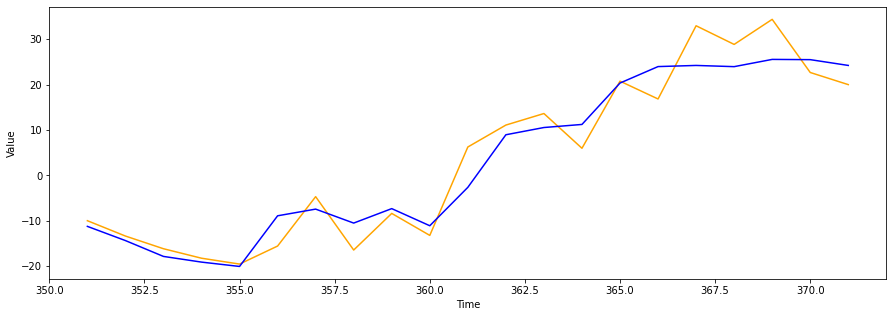

In [59]:
pred = model.predict(x_test)

pred_range = np.arange(len(y_train),len(y_train) + len(pred))

plt.figure(figsize = (15, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color = 'orange', label='ground-truth')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label = 'prediction')

In [ ]:
IMDB 데이터셋을 적용

In [62]:
from tensorflow.keras.datasets import imdb

num_words = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)
print(x_train.shape, y_train.shape)

(25000,) (25000,)


In [66]:
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key
    
for i in range(10,20):
    print('{}번째로 많이 쓰인 단어 : {}'.format(i, imdb_get_word_index[i]))

10번째로 많이 쓰인 단어 : i
11번째로 많이 쓰인 단어 : this
12번째로 많이 쓰인 단어 : that
13번째로 많이 쓰인 단어 : was
14번째로 많이 쓰인 단어 : as
15번째로 많이 쓰인 단어 : for
16번째로 많이 쓰인 단어 : with
17번째로 많이 쓰인 단어 : movie
18번째로 많이 쓰인 단어 : but
19번째로 많이 쓰인 단어 : film


In [7]:
# IMDB 데이터셋을 적용
from tensorflow.keras.datasets import imdb

num_words= 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen = max_len)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32))
model.add(SimpleRNN(32, return_sequences=True, dropout=0.15,
         recurrent_dropout=0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss = 'binary_crossentropy',
             metrics =['acc'])

model.summary()

history = model.fit(pad_x_train,y_train,
                   batch_size = 32, epochs=15,
                   validation_split=0.2)

C:\Users\sbs\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\sbs\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 324,193
Trainable params: 324,193
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 96s 5ms/sample - loss: 0.6985 - acc: 0.5127 - val_loss: 0.6805 - val_acc: 0.5840
Epoch 2/15
20000/20000 [==============================] - 

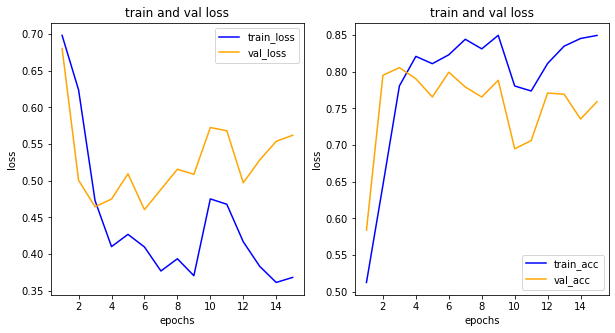

In [11]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()

In [12]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(SimpleRNN(32, return_sequences=True))
# model.add(SimpleRNN(32, return_sequences=False))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [13]:
#LSTM
reuters

<module 'tensorflow.keras.datasets.reuters' from 'C:\\Users\\sbs\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\reuters\\__init__.py'>

In [19]:
# Conv1D(batch_size, timesteps, channels)
# 반환(batch_size, timesteps, filters)

from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim=32,
                   input_length=max_len))

model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(7))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

model.summary()



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 70, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)               

In [15]:
#LSTM
from tensorflow.keras.datasets import reuters

num_words = 10000

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=64))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['acc'])

history = model.fit(pad_x_train,y_train,
                   batch_size = 32, epochs=15,
                   validation_split=0.2)

C:\Users\sbs\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\sbs\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Train on 7185 samples, validate on 1797 samples
Epoch 1/15
7185/7185 [==============================] - 71s 10ms/sample - loss: 2.5516 - acc: 0.3513 - val_loss: 2.4071 - val_acc: 0.3450
Epoch 2/15
7185/7185 [==============================] - 70s 10ms/sample - loss: 2.4093 - acc: 0.3534 - val_loss: 2.4096 - val_acc: 0.3450
Epoch 3/15
7185/7185 [==============================] - 70s 10ms/sample - loss: 2.1352 - acc: 0.4267 - val_loss: 1.8640 - val_acc: 0.4830
Epoch 4/15
7185/7185 [==============================] - 71s 10ms/sample - loss: 1.7504 - acc: 0.5445 - val_loss: 1.7160 - val_acc: 0.5648
Epoch 5/15
7185/7185 [==============================] - 71s 10ms/sample - loss: 1.6119 - acc: 0.5836 - val_loss: 1.8670 - val_acc: 0.5014
Epoch 6/15
7185/7185 [==============================] - 72s 10ms/sample - loss: 1.5087 - acc: 0.6075 - val_loss: 1.6339 - val_acc: 0.5620
Epoch 7/15
7185/7185 [==============================] - 72s 10ms/sample - loss: 1.4262 - acc: 0.6340 - val_loss: 1.5359 - va

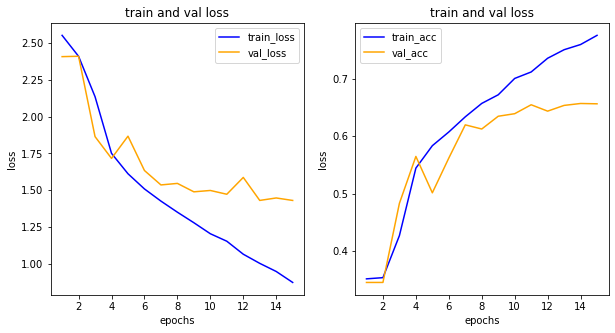

In [16]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()

In [18]:
# Conv1D(batch_size, timesteps, channels)
# 반환(batch_size, timesteps, filters)

from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim=32,
                   input_length=max_len))

model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(7))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 70, 32)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [ ]:
# BERT
# 자연어 처리 분야에서 최고의 성능을 보여주고 연구 및 활용되는 방법이다.
# 질문 - 대답에 대한 문제를 다루는 SQuAD 와 korQuAD에 도전함과 동시에 상위권을 독신한 아주 뛰어난 방법입니다.
# 구글에서 만들었으며 Transformer의 형태를 이용합니다.

In [ ]:
# 마지막 정리
# 순환 신경망은 시퀀스 또는 시계열 데이터 처리에 특화
# Embedding층은 수많은 단어를 표현할 수 있으며 항상 모델의 첫 번째 층만 사용할 수 있다.

# Embedding층은 (batchi_size, sequence_length) 형태로 입력받고
# (batch_size, sequence_length, output_dim) 형태로 출력

# Embedding층은 단어의 관계와 맥락을 파알할 수 없으며 이를 해결하기 위해서 사용되는 것이 SimpleRNN이다.
# 이것은 순환 신경망의 가장 기본적인 형태를 나타내며, 출력값의 없데이트를위해서 이전 상태를 사용한다.

# SimpleRNN은 (batch_size, timesteps,input_dim)을 입력으로 받고
# (batch_size, units)을 출력한다.

# SimpleRNN층은 그래디언트 손실 문제를 일읠 수 있으며, 이를 해결하기 위해 만들어 진 것이 LSTM이다.
# LSTM은 과거의 정보를 나르는 Cell state가 있으며, 정보를 제거 또는 제공하기 위한 input_gate, forget_data, output_gate를 가지고 있다.

# Conv2D층을 통해 이미지 데이터를 추출할 수 있었다면 Conv1D를 통해 시퀀스 데이터의 특징을 추출할 수 있다.

# Conv1D층은 (batch_size, timesteps, channels)형태로 입력받으며
# (batch_size, timesteps, filters)형태로 출력한다.

# BERT는 자연어 처리 분야에서 최고 성능을 달성한 모델이며 자연어 치리 뿐만 아니라 다른 분야에서도 뛰어난 성능을 보여준다.